In [1]:
import pandas as pd
import numpy as np 

import sys
sys.path.append('../../Function/')
import function

from keras.layers import Dense, Dropout
from keras.models import Sequential


In [2]:
df = pd.read_excel('../../../site_info_ver_4_lite.xlsx')

remove pollution site Successfully
model on site Hermon Stream (Banias)
Focus on  Israelis
shape of dataset (1858, 30)
features : Index(['Date', 'is_weekend', 'operations', 'is_jewish_holiday',
       'is_muslims_holiday', 'Temperature', 'Haifa_pm2.5', 'Jerusalem_nox',
       'Ashkelon_nox', 'Beer-Sheva_nox', 'Jerusalem_so2', 'Haifa_so2',
       'Ashkelon_so2', 'Beer-Sheva_so2', 'Tel_Aviv-Yafo_pm10_exceeded',
       'Ashkelon_pm10_exceeded', 'Beer-Sheva_pm10_exceeded',
       'Haifa_pm2.5_exceeded', 'Beer-Sheva_pm2.5_exceeded',
       'Tel_Aviv-Yafo_nox_exceeded', 'Jerusalem_nox_exceeded',
       'Haifa_nox_exceeded', 'Season_autumn', 'Season_spring', 'Season_summer',
       'Season_winter', 'Israelis_Count', 'day', 'month', 'year'],
      dtype='object')


,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,Temperature,Haifa_pm2.5,Jerusalem_nox,Ashkelon_nox,Beer-Sheva_nox,Jerusalem_so2,...,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Season_autumn,Season_spring,Season_summer,Season_winter,day,month,year,Israelis_Count
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1,0,0,0,11.4,26.2,501.7,3.8,9.7,0.1,...,1,1,0,0,0,1,1,1,2016,4.262694


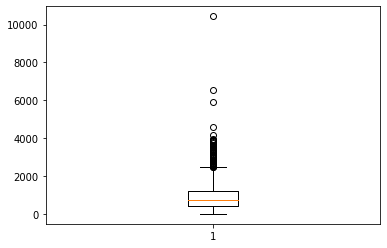

In [3]:
dataset = df.copy()
sites = dataset.Site_Name.unique()
site_name = sites[5]
target = 'Israelis_Count'
target_title = 'Israelis'
dataset = dataset.loc[dataset.Site_Name==site_name]
dataset = dataset.drop(['Total','Tourists_Count','Day_before_Total'],axis=1)
dataset = function.remove_pollution_site(dataset)
# dataset = dataset.drop(dataset.filter(regex='exceeded').columns, axis=1)
# dataset = dataset.drop(dataset.filter(regex='Season').columns, axis=1)

print('model on site',site_name)
print('Focus on ',target_title)

dataset = function.remove_outliers(dataset, target)
dataset = function.remove_unique_one(dataset)
dataset = function.remove_high_corr(dataset, target,0.4)
dataset = function.split_date(dataset)
# dataset = function.last_year_entries_info(dataset,target)

print('shape of dataset',dataset.shape)
print('features :',dataset.columns)
dataset.set_index('Date',inplace=True)
dataset = function.move_target_to_last(dataset, target)
dataset.Israelis_Count = np.log(dataset.Israelis_Count+0.001)

dataset.head(1)

In [4]:
dataset = dataset.sort_values(['day','month'])
dataset

,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,Temperature,Haifa_pm2.5,Jerusalem_nox,Ashkelon_nox,Beer-Sheva_nox,Jerusalem_so2,...,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Season_autumn,Season_spring,Season_summer,Season_winter,day,month,year,Israelis_Count
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1,0,0,0,11.4,26.2,501.7,3.800000,9.7,0.10,...,1,1,0,0,0,1,1,1,2016,4.262694
2017-01-01,0,0,1,0,15.3,60.8,733.1,14.200000,111.6,0.35,...,1,1,0,0,0,1,1,1,2017,6.669499
2018-01-01,0,0,0,0,11.3,53.9,481.4,20.000000,21.0,1.50,...,1,1,0,0,0,1,1,1,2018,4.787500
2019-01-01,0,1,0,0,19.6,109.7,479.7,6.643478,84.0,0.90,...,1,1,0,0,0,1,1,1,2019,6.257670
2020-01-01,0,0,0,0,15.2,124.1,1045.5,21.200000,109.6,4.40,...,1,1,0,0,0,1,1,1,2020,6.033089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,1,0,0,0,30.9,95.0,199.5,8.900000,32.0,1.50,...,1,1,1,0,0,0,31,10,2020,7.656811
2016-12-31,1,0,1,0,11.1,37.6,261.3,7.700000,48.3,0.60,...,1,1,0,0,0,1,31,12,2016,6.939255
2017-12-31,0,0,0,0,16.7,104.3,697.5,18.900000,73.7,1.30,...,1,1,0,0,0,1,31,12,2017,5.634793


In [5]:
# dateValues = dataset[['day','month','year']].loc[dataset.year>2016].values
# size = int(np.round(len(dateValues)*0.8))
# dateValues_train = dateValues[:size]
# dateValues_test = dateValues[size:]

# print('train', len(dateValues_train))
# print('test', len(dateValues_test))

In [6]:
dataset = dataset.drop(dataset.filter(regex='exceeded').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='so2').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='nox').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='pm10').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='pm2.5').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='Season').columns, axis=1)
dataset = dataset.drop(dataset.filter(regex='Season').columns, axis=1)
dataValues_train = dataset.loc[dataset.year<=2020].values
dataValues_test = dataset.loc[dataset.year>=2019].values

print(len(dataset.loc[dataset.year==2016]))
print(len(dataset.loc[dataset.year==2017]))
print(len(dataset.loc[dataset.year==2018]))
print(len(dataset.loc[dataset.year==2019]))
print(len(dataset.loc[dataset.year==2020]))
print(len(dataset.loc[dataset.year==2021]))

print('train', len(dataValues_train))
print('test', len(dataValues_test))

359
354
358
339
277
171
train 1687
test 787


In [7]:
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
test_scaler = StandardScaler()
y_test_scaler = StandardScaler()

dataValues_train_scaled = train_scaler.fit_transform(dataValues_train)
dataValues_test_scaled = test_scaler.fit_transform(dataValues_test)

y_test_scaled = y_test_scaler.fit_transform(dataValues_test[:,-1:])



In [8]:
n_past = 2
n_predict = 1

X_train =[]
y_train =[]
for i in range(len(dataValues_train_scaled)):
    if dataValues_train[i][-2] ==2016 or dataValues_train[i][-2] == 2017 or dataValues_train[i][-3] != dataValues_train[i-1][-3] or dataValues_train[i][-4] != dataValues_train[i-1][-4] :
        continue
    X_train.append(dataValues_train_scaled[i-n_past:i])
    y_train.append(dataValues_train_scaled[i:i+1,-1 :])

X_test = []
y_test = []
    
for i in range(len(dataValues_test_scaled)):
    if dataValues_test[i][-2] == 2019 or dataValues_test[i][-2] == 2020 or dataValues_test[i][-3] != dataValues_test[i-1][-3] or dataValues_test[i][-4] != dataValues_test[i-1][-4]:
        continue
    X_test.append(dataValues_test_scaled[i-n_past:i])
    y_test.append(dataValues_test[i:i+1,-1:])
  
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)

y_test = y_test.reshape(y_test.shape[0])
y_train = y_train.reshape(y_train.shape[0])
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))
print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

    

X_train shape == (973, 2, 9).
y_train shape == (973,).
X_test shape == (155, 2, 9).
y_test shape == (155,).


In [9]:
from keras import backend
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# from keras.optimizers import ADAM

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=8, return_sequences=True, input_shape=(n_past, dataValues_train_scaled.shape[1])))
# Adding Dropout
# model.add(Dropout(0.35))
# Adding 2nd LSTM layer
model.add(LSTM(units=8, return_sequences=True))

#Adding Dropout
# model.add(Dropout(0.))
# model.add(LSTM(units=68, return_sequences=True))

# #Adding Dropout
# model.add(Dropout(0.35))

# model.add(LSTM(units=68, return_sequences=True))

# #Adding Dropout
# model.add(Dropout(0.35))

# model.add(LSTM(units=68, return_sequences=True))

# #Adding Dropout
# model.add(Dropout(0.35))

# model.add(LSTM(units=68, return_sequences=True))

#Adding Dropout
model.add(Dropout(0.35))

model.add(LSTM(units=8, return_sequences=False))

#Adding Dropout
model.add(Dropout(0.35))


# Output layer
model.add(Dense(units=1))

# Compiling the Neural Network
model.compile(optimizer = 'adam', loss=[rmse],metrics='mean_squared_error')

In [10]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=20,verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20,verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1,save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=1000, callbacks=[es, rlr, mcp, tb], validation_split=0.4, verbose=1, batch_size=1)

Epoch 1/1000
580/583 [============================>.] - ETA: 0s - loss: 0.8004 - mean_squared_error: 1.0833
Epoch 00001: val_loss improved from inf to 0.69345, saving model to weights.h5
583/583 [==============================] - 12s 9ms/step - loss: 0.8000 - mean_squared_error: 1.0812 - val_loss: 0.6935 - val_mean_squared_error: 0.7232 - lr: 0.0010
Epoch 2/1000
582/583 [============================>.] - ETA: 0s - loss: 0.7482 - mean_squared_error: 0.9662
Epoch 00002: val_loss improved from 0.69345 to 0.68466, saving model to weights.h5
583/583 [==============================] - 4s 7ms/step - loss: 0.7478 - mean_squared_error: 0.9650 - val_loss: 0.6847 - val_mean_squared_error: 0.7085 - lr: 0.0010
Epoch 3/1000
583/583 [==============================] - ETA: 0s - loss: 0.7406 - mean_squared_error: 0.9358
Epoch 00003: val_loss improved from 0.68466 to 0.64678, saving model to weights.h5
583/583 [==============================] - 4s 7ms/step - loss: 0.7406 - mean_squared_error: 0.9358 - v

In [11]:
model.load_weights('weights.h5')
prediction = np.exp(y_test_scaler.inverse_transform(model.predict(X_test)))
prediction
# res2 = pd.DataFrame(
#     data={
#         'Prediction':prediction.T[0],
#         'Actual': y_test.values
#     },
#     index=y_test.index
# )

print('rmse',function.get_rmse(prediction, np.exp(y_test)))
print('rmse',np.std(np.exp(y_test)))



rmse 609.5769899116287
rmse 559.0119206322429


In [14]:
# from lime_stability.stability import LimeTabularExplainerOvr


# class_names=['Israelis_Count']

# categorical_features = np.argwhere(
#     np.array([len(set(dataValues_train_scaled[:,x]))
#     for x in range(dataValues_train_scaled.shape[1])]) <= 10).flatten()
# print(dataset.columns.shape)
# print(categorical_features.shape)
# print(X_train.shape)

# explainer = LimeTabularExplainerOvr(X_train, 
#                                                    feature_names=dataset.columns,
#                                                    class_names=class_names, 
#                                                    categorical_features=categorical_features, 
#                                                    verbose=True, mode='regression')

# exp = explainer.explain_instance(X_test[0],model.predict,num_features=10)
# exp.show_in_notebook(show_table=True)
# exp.as_pyplot_figure()


(9,)
(5,)
(973, 2, 9)


ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [ ]:
rmse_str = str(np.round(function.get_rmse(res2.Prediction, res2.Actual),2))
import os 
# Check whether the specified path exists or not
path = site_name+'/'+rmse_str
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
model.save(path)